In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import csv
from scipy.sparse import csr_matrix
from surprise import Dataset, Reader, SVD
from surprise.model_selection import train_test_split
from surprise import accuracy
from preprocess import *
from recommendation_system_methods import *
import pickle
from matplotlib import pyplot as plt

## 1. Data loading

In [2]:
combined_data_path = "data/combined_data_1.txt"
movies_data_path = "data/movie_titles.csv"

In [3]:
movies_data_path_new = "data/movie_titles_new.csv"

ratings_df = load_combined_data(combined_data_path)
preprocess_movie_titles(movies_data_path, movies_data_path_new)
movies_df = load_movie_titles(movies_data_path_new)

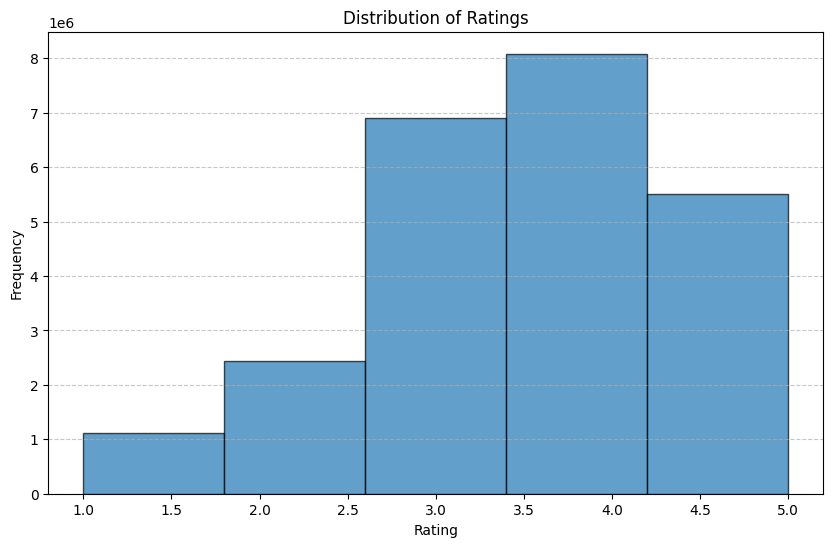

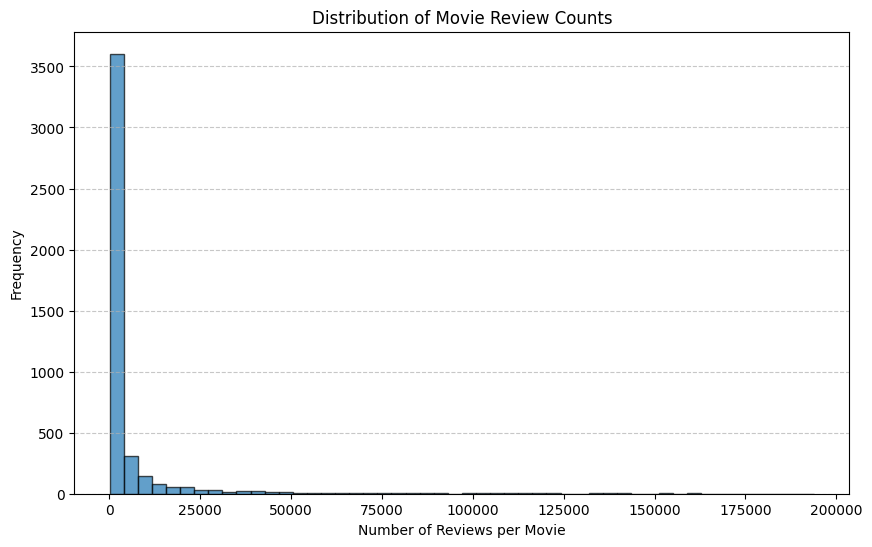

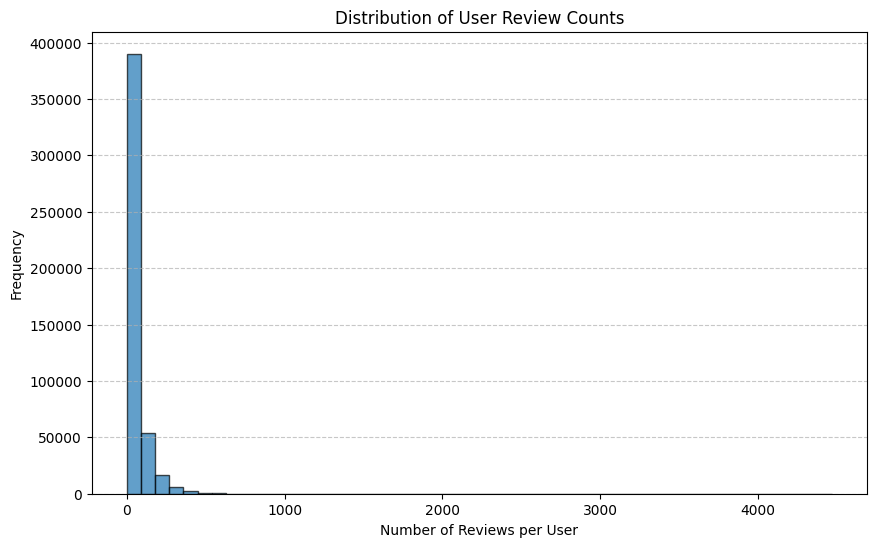

In [4]:
perform_eda(ratings_df, movies_df)


In [5]:
ratings_df.head()

,movie_id,user_id,rating
0,1,1488844,3
1,1,822109,5
2,1,885013,4
3,1,30878,4
4,1,823519,3


In [6]:
movies_df.head()

,movie_id,title
0,1,Dinosaur Planet
1,2,Isle of Man TT 2004 Review
2,3,Character
3,4,Paula Abdul's Get Up & Dance
4,5,The Rise and Fall of ECW


In [7]:
merged_df = ratings_df.merge(movies_df, on="movie_id")
merged_df.head()

,movie_id,user_id,rating,title
0,1,1488844,3,Dinosaur Planet
1,1,822109,5,Dinosaur Planet
2,1,885013,4,Dinosaur Planet
3,1,30878,4,Dinosaur Planet
4,1,823519,3,Dinosaur Planet


## 2. Data preprocessing

#### Filter movies and customers by review thresholds

In [8]:
functions = ["count", "mean"]

drop_movie_list, movie_benchmark = filter_dataframe(merged_df, 'movie_id', functions)
print(f"Movie minimum times of review: {movie_benchmark}")

drop_cust_list, cust_benchmark = filter_dataframe(merged_df, 'user_id', functions)
print(f"Customer minimum times of review: {cust_benchmark}")

ratings_df = ratings_df[~ratings_df["movie_id"].isin(drop_movie_list)]
ratings_df = ratings_df[~ratings_df["user_id"].isin(drop_cust_list)]

Movie minimum times of review: 1799.0
Customer minimum times of review: 52.0


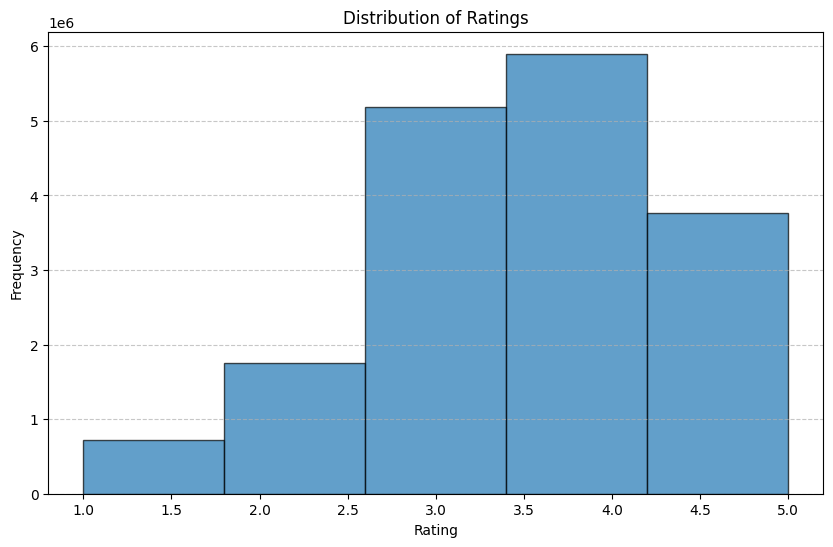

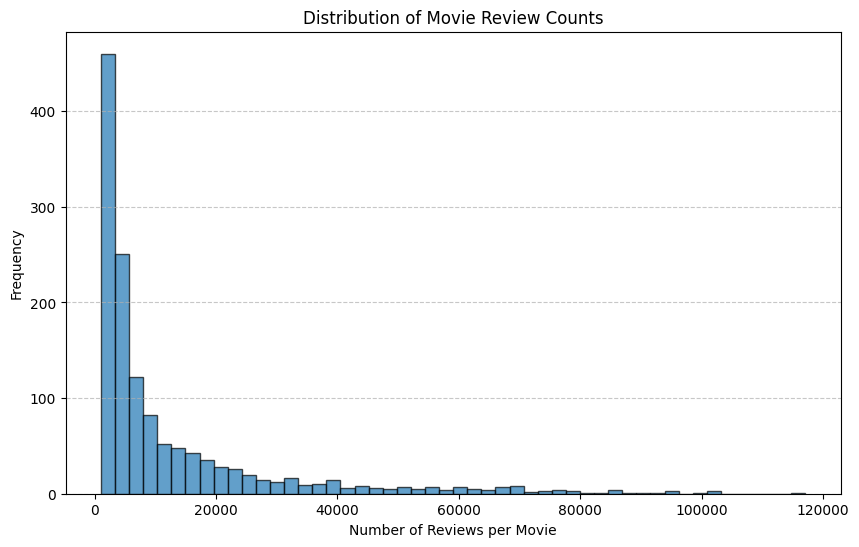

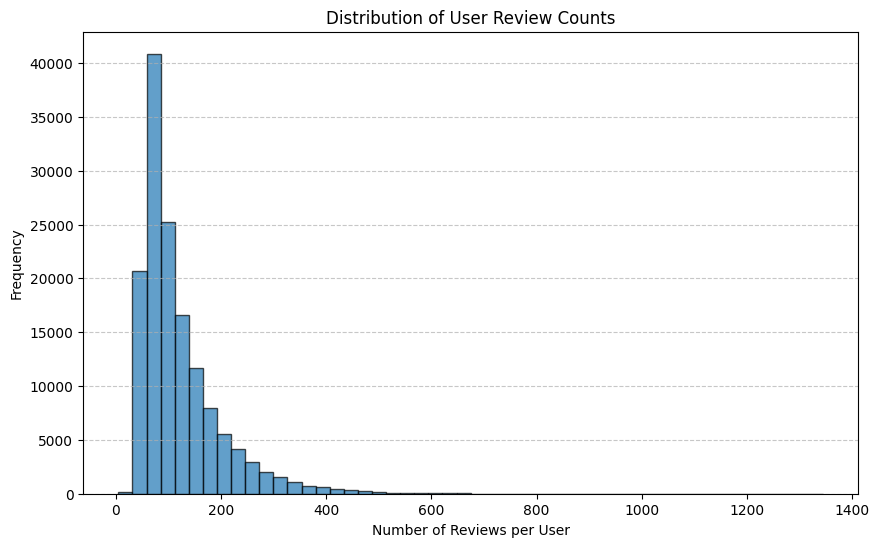

In [9]:
perform_eda(ratings_df, movies_df)

## 3. Apply collaborative filtering

In [8]:
# Use Surprise for collaborative filtering
reader = Reader(rating_scale=(1, 5))
data = Dataset.load_from_df(ratings_df[["user_id", "movie_id", "rating"]], reader)

trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

model = SVD()
model.fit(trainset)

predictions = model.test(testset)
rmse = accuracy.rmse(predictions)
print(f"Model RMSE: {rmse}")


RMSE: 0.8478
Model RMSE: 0.8478395996778104


## 4. Save dfs and model to pickle

In [16]:
save_dataframe_to_pickle(ratings_df, "pickles/ratings_df.pkl")
save_dataframe_to_pickle(movies_df, "pickles/movies_df.pkl")

save_model_to_pickle(model, "pickles/svd_model.pkl")

DataFrame saved to ratings_df.pkl
DataFrame saved to movies_df.pkl
